# Line Detection in Hallway Image using Hough Transform

This notebook demonstrates line detection in an image using the Canny edge detection algorithm and the Probabilistic Hough Transform. The process consists of the following steps:

1. Load and prepare the image
2. Apply edge detection using the Canny algorithm
3. Detect lines using the Probabilistic Hough Transform
4. Overlay the detected lines on the original image

## 1. Import Required Libraries

In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.transform import probabilistic_hough_line

# Enable inline plotting
%matplotlib inline

## 2. Load and Prepare the Image

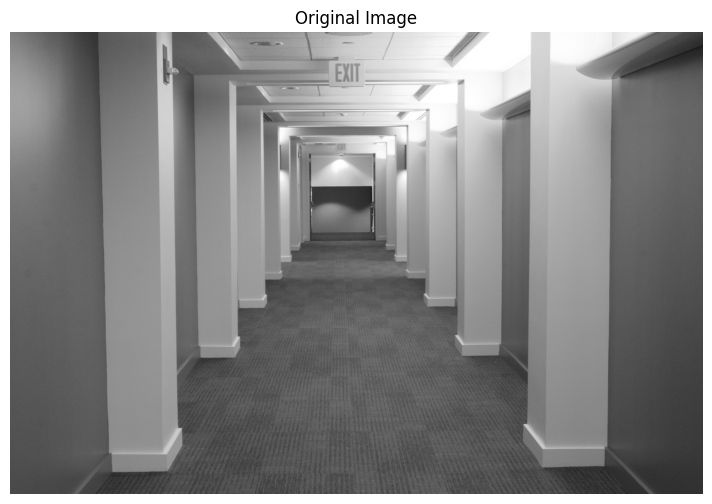

In [8]:
# Load and prepare the image
img_path = os.path.join("Images", "Ασκηση 6", "hallway.png")
img_rgb = Image.open(img_path).convert("RGB")
img = np.array(img_rgb)
gray = rgb2gray(img)

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

## 3. Edge Detection

We'll use the Canny edge detection algorithm with a slightly higher sigma to reduce texture noise and tweaked low/high thresholds.

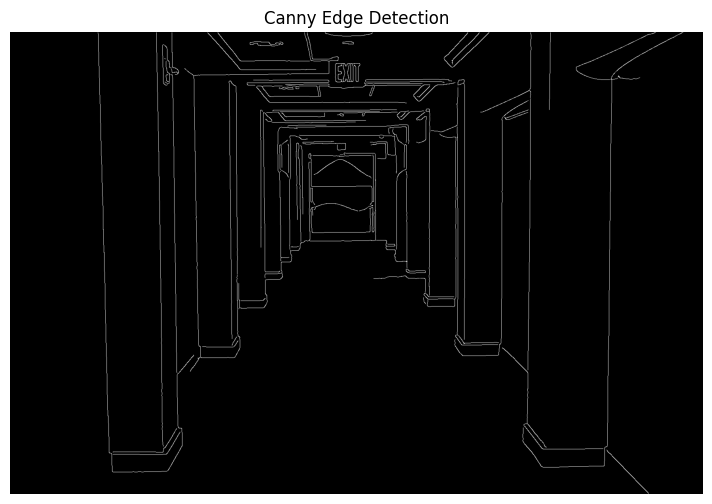

In [9]:
# Edge detection using Canny algorithm
edges = canny(gray, sigma=2.0, low_threshold=0.05, high_threshold=0.2)

# Display the edge-detected image
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edge Detection')
plt.show()

## 4. Probabilistic Hough Transform

The Probabilistic Hough Transform is an optimization of the standard Hough Transform that processes only a random subset of points. It returns line segments rather than the parameters of the line.

In [10]:
# Probabilistic Hough Transform to detect lines
lines = probabilistic_hough_line(
    edges,
    threshold=10,     # accumulator threshold
    line_length=60,   # minimum accepted line length
    line_gap=10       # maximum gap to allow connecting segments
)

print(f"Number of lines detected: {len(lines)}")
print(f"Example of a detected line: {lines[0] if lines else 'No lines detected'}")

Number of lines detected: 199
Example of a detected line: ((475, 751), (469, 368))


## 5. Overlay Detected Lines on the Original Image

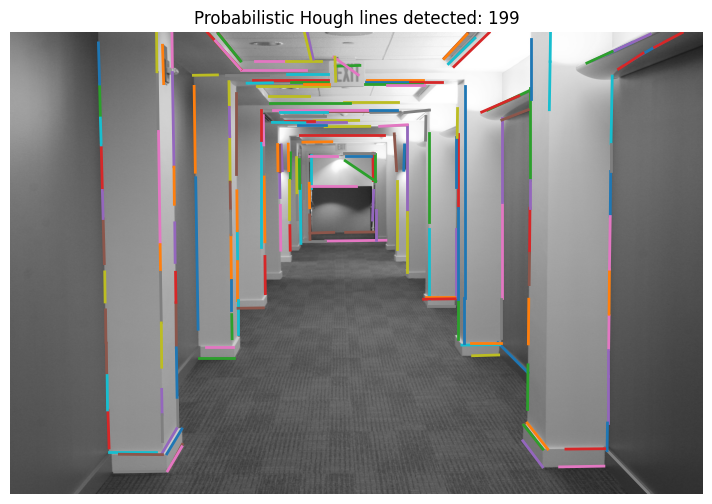

Overlay image saved to: hallway_hough.png


In [11]:
# Overlay detected lines on the original image
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)
for ((x0, y0), (x1, y1)) in lines:
    ax.plot([x0, x1], [y0, y1], linewidth=2)  # default color cycle
ax.set_axis_off()
ax.set_title(f"Probabilistic Hough lines detected: {len(lines)}")
plt.show()

# Save the overlay for downloading
overlay_path = "hallway_hough.png"
fig.savefig(overlay_path, bbox_inches="tight")
print(f"Overlay image saved to: {overlay_path}")

## 6. Experiment with Different Parameters (Optional)

You can experiment with different parameters for both the Canny edge detection and the Probabilistic Hough Transform to see how they affect the results.

In [12]:
# Function to perform line detection with different parameters
def detect_lines(sigma, low_threshold, high_threshold, hough_threshold, min_line_length, max_line_gap):
    # Edge detection
    edges = canny(gray, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)
    
    # Hough transform
    lines = probabilistic_hough_line(
        edges,
        threshold=hough_threshold,
        line_length=min_line_length,
        line_gap=max_line_gap
    )
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Edge detection result
    ax1.imshow(edges, cmap='gray')
    ax1.set_title(f'Canny: sigma={sigma}, low={low_threshold}, high={high_threshold}')
    ax1.set_axis_off()
    
    # Line detection result
    ax2.imshow(img)
    for ((x0, y0), (x1, y1)) in lines:
        ax2.plot([x0, x1], [y0, y1], linewidth=2)
    ax2.set_title(f'Hough: threshold={hough_threshold}, length={min_line_length}, gap={max_line_gap}\nLines: {len(lines)}')
    ax2.set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    return len(lines)

# Try with different parameters - uncomment to experiment
# detect_lines(sigma=1.5, low_threshold=0.03, high_threshold=0.15, hough_threshold=15, min_line_length=80, max_line_gap=5)
# detect_lines(sigma=2.5, low_threshold=0.08, high_threshold=0.25, hough_threshold=8, min_line_length=40, max_line_gap=15)